## Library Imports

In [2]:
from scipy.io.wavfile import read
import numpy as np
import pandas as pd
import os
import sys
import librosa
import matplotlib.pyplot as plt

## Initializing data structures

In [3]:
list_of_spiromask_audio = [] ## format with [filename, filepath, audio, sr]
list_of_ncs_audio = [] ## format with [filename, filepath, audio, sr]

## Importing the audio files from the test set
importing Audio of spirometer test and some ncs audio

In [4]:

audio_sample_path = './Data/2.SpiroMask_Audio_Samples/'
for filename in os.listdir(audio_sample_path):
    f = os.path.join(audio_sample_path, filename)
    if os.path.isfile(f):
        data,sr = librosa.load(f,sr=16000)
        list_of_spiromask_audio.append([filename, f, data, sr])

ncs_sample_path = './Data/ncs/'
for filename in os.listdir(ncs_sample_path):
    f = os.path.join(ncs_sample_path, filename)
    if os.path.isfile(f):
        data,sr = librosa.load(f,sr=16000)
        list_of_ncs_audio.append([filename, f, data, sr])


### Visualize audio files
visualize one audio of spirometer audio and one ncs audio

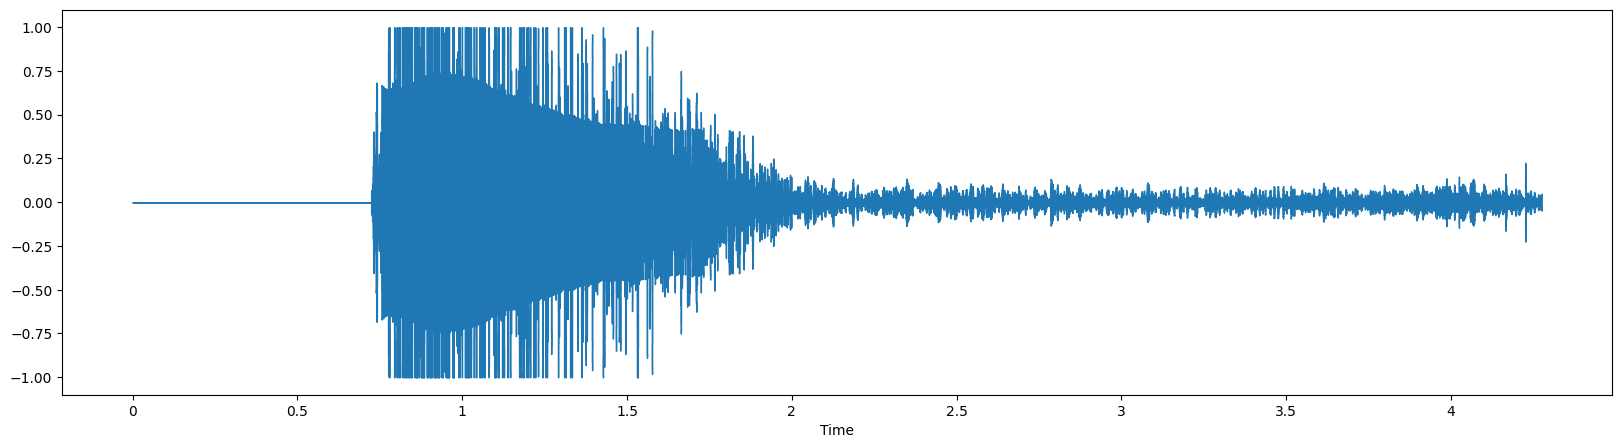

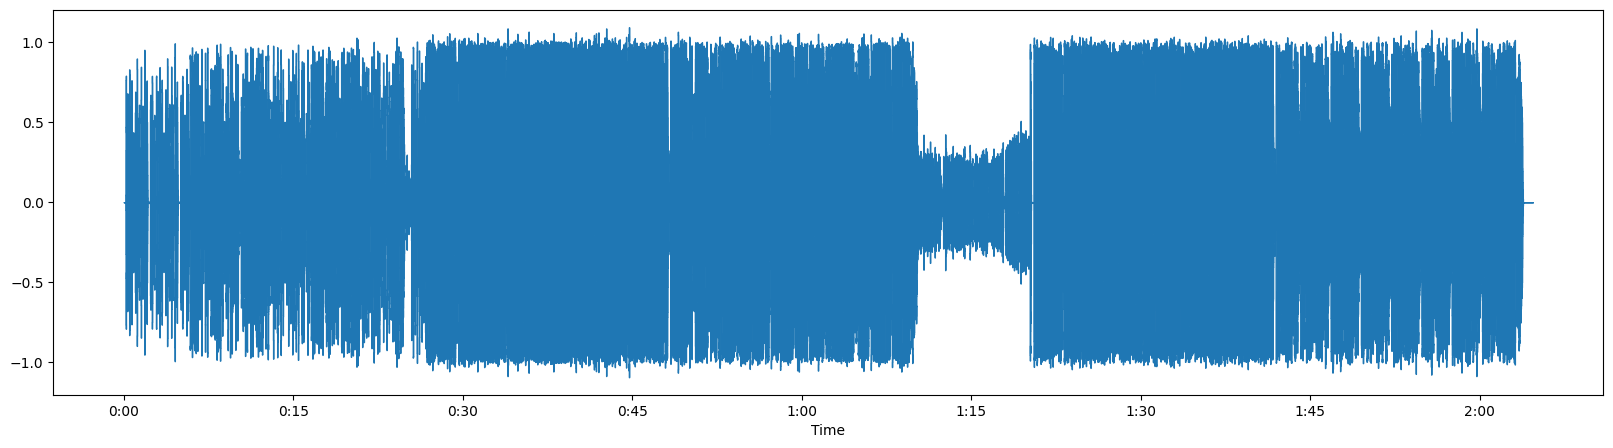

In [5]:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(list_of_spiromask_audio[0][2])

plt.figure(figsize=(20, 5))
librosa.display.waveshow(list_of_ncs_audio[0][2])
plt.show()

## Extract the features from the audio files
STFT or Short time fourier transform is extracted from the audio file and stored.

In [15]:
all_features = []
spectrogram_=[]
header = ['pid']
i=0

for test in list_of_spiromask_audio:
    curr_feature = np.array([])
    curr_spectrogram={}

    pid = np.array([test[0].split('.')[0]])
    
    librosa_stft = librosa.stft(test[2],hop_length=512)

    curr_feature = np.concatenate((curr_feature,pid))

    features = np.mean(np.abs(librosa_stft),axis=1)

    curr_feature = np.concatenate((curr_feature,features))
    curr_spectrogram = np.concatenate((curr_spectrogram,librosa_stft))

    all_features.append(curr_feature)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

## Give the results

In [10]:
results_csv = pd.read_csv("./phone_vs_pc_diff_result.csv")
results_csv_df = pd.DataFrame(results_csv)
results_csv_df

,S. No.,PID,Ground Truth,Unnamed: 3,Predicted on PC,Unnamed: 5,Predicted on Android,Unnamed: 7
0,NaN,NaN,FEV1,FVC,FEV1,FVC,FEV1,FVC
1,1.0,P0,2.89,3,2.9001,3.06,2.9,3.06
2,2.0,P1,2.7,3.76,2.808,3.6,3.07,3.2
3,3.0,P10,3.36,3.6,3.049,3.378,3.36,3.17
4,4.0,P11,2.04,3.94,2.33,3.57,2.4,3.14
5,5.0,P12,2.78,3.1,2.75,3.15,2.88,3.13


## Difference between android and pc results
The difference is due to different library being used. The audio samples on which the model was trained are compared with the same audio after processing on the android device.

In [ ]:
error_from_android = ((pd.to_numeric(results_csv_df[1:]['Predicted on Android']).mean() - pd.to_numeric(results_csv_df[1:]['Predicted on PC']).mean())/pd.to_numeric(results_csv_df[1:]["Predicted on Android"]).mean())*100
error_from_android


5.290212183435994